In [1]:
import pandas as pd
import numpy as np

# DataFrame 은 데이터를 검사하고 시각적으로 확인하는 용도로 더 쓰이는 것 같다.
# 세부적인 조작은 불가하며, 데이터 삽입 제거 property수정(열)등이 가능해 보임

# numpy는 고차원의 데이터를 세부적인 조작이 가능하게 한다. 
# 요소 하나하나에 접근이 가능하고 복잡한 연산을 가능하게 함

In [2]:
df = pd.read_csv('AXISX_resample.csv')
print(df)

          chip    wire parameter  segment     value
0        CHIP1  WIRE10     AXISX        1  1.873603
1        CHIP1  WIRE10     AXISX        1  2.015115
2        CHIP1  WIRE10     AXISX        1  2.033436
3        CHIP1  WIRE10     AXISX        1  1.987634
4        CHIP1  WIRE10     AXISX        1  1.932988
...        ...     ...       ...      ...       ...
480063  CHIP10   WIRE9     AXISX        7  0.598421
480064  CHIP10   WIRE9     AXISX        7  0.549144
480065  CHIP10   WIRE9     AXISX        7  0.520084
480066  CHIP10   WIRE9     AXISX        7  0.539036
480067  CHIP10   WIRE9     AXISX        7  0.611056

[480068 rows x 5 columns]


In [8]:
df = pd.read_csv('CLAMP_resample.csv')

In [3]:
df_np = np.array(df)

In [4]:
# AXISX - 1 (CHIP WIRE 구분 X)
cls1 = df_np[df_np[:,3] == 1, :]
print(cls1)
print(cls1.shape)
cls2 = df_np[df_np[:, 3] == 2, :]
cls3 = df_np[df_np[:, 3] == 3, :]
cls4 = df_np[df_np[:, 3] == 4, :]
cls5 = df_np[df_np[:, 3] == 5, :]
cls6 = df_np[df_np[:, 3] == 6, :]
cls7 = df_np[df_np[:, 3] == 7, :]

[['CHIP1' 'WIRE10' 'AXISX' 1 1.873603]
 ['CHIP1' 'WIRE10' 'AXISX' 1 2.015115]
 ['CHIP1' 'WIRE10' 'AXISX' 1 2.033436]
 ...
 ['CHIP10' 'WIRE9' 'AXISX' 1 3.107723]
 ['CHIP10' 'WIRE9' 'AXISX' 1 3.2277549999999997]
 ['CHIP10' 'WIRE9' 'AXISX' 1 3.323781]]
(36793, 5)


In [10]:
# CLMAP- 1 (CHIP WIRE 구분 X)
cls1 = df_np[df_np[:,3] == 1, :]
print(cls1)
print(cls1.shape)
cls2 = df_np[df_np[:, 3] == 2, :]
cls3 = df_np[df_np[:, 3] == 3, :]
cls4 = df_np[df_np[:, 3] == 4, :]
cls5 = df_np[df_np[:, 3] == 5, :]
cls6 = df_np[df_np[:, 3] == 6, :]

[['CHIP1' 'WIRE10' 'CLAMP' 1 2.2368580000000002]
 ['CHIP1' 'WIRE10' 'CLAMP' 1 1.909297]
 ['CHIP1' 'WIRE10' 'CLAMP' 1 1.554571]
 ...
 ['CHIP10' 'WIRE9' 'CLAMP' 1 0.044377999999999994]
 ['CHIP10' 'WIRE9' 'CLAMP' 1 0.13377]
 ['CHIP10' 'WIRE9' 'CLAMP' 1 0.10313]]
(10759, 5)


### AXISX - 1 조합의 각 개수

- Class 1 : 36793
- Class 2 : 56760
- Class 3 : 227290
- Class 4 : 35728
- Class 5 : 64061
- Class 6 : 23611
- Class 7 : 35825    
  
  
- For All : 480068  

각 클래스 마다 총 190개의 Chip Wire 조합이 존재한다.  
이에 반해 각 클래스가 가지는 시계열 데이터 개수의 차이는 극적임..

In [5]:
print(cls1.shape)
print(cls2.shape)
print(cls3.shape)
print(cls4.shape)
print(cls5.shape)
print(cls6.shape)
print(cls7.shape)
print(cls1.shape[0] + cls2.shape[0] + cls3.shape[0] + cls4.shape[0] + cls5.shape[0] + cls6.shape[0] + cls7.shape[0] )

(36793, 5)
(56760, 5)
(227290, 5)
(35728, 5)
(64061, 5)
(23611, 5)
(35825, 5)
480068


### CLAMP - 1 조합의 각 개수

- Class 1 : 10759
- Class 2 : 41674
- Class 3 : 231021
- Class 4 : 40777
- Class 5 : 84927
- Class 6 : 70910
  
  
- For All : 480068  

In [11]:
print(cls1.shape)
print(cls2.shape)
print(cls3.shape)
print(cls4.shape)
print(cls5.shape)
print(cls6.shape)
print(cls1.shape[0] + cls2.shape[0] + cls3.shape[0] + cls4.shape[0] + cls5.shape[0] + cls6.shape[0])

(10759, 5)
(41674, 5)
(231021, 5)
(40777, 5)
(84927, 5)
(70910, 5)
480068


### CHIP WIRE 분류 함수 정의

- Labeling : 'chip' or 'wire' 모은 리스트 생성
- split_out_chip : 총 10가지 CHIP을 분류하여 리스트 반환
- split_out_wire : CHIP이 분류된 DF를 19가지 WIRE을 분류하여 리스트 반환
- split_out : 'split_out_chip' + 'split_out_wire'

In [6]:
def Labeling(label, ran):
    lst = []
    for i in range(ran):
        num = i + 1
        s = '{0}{1}'.format(label, num)
        lst.append(s)
    return lst
chip = Labeling('CHIP', 10)
wire = Labeling('WIRE', 19)
print(chip)
print(wire)

['CHIP1', 'CHIP2', 'CHIP3', 'CHIP4', 'CHIP5', 'CHIP6', 'CHIP7', 'CHIP8', 'CHIP9', 'CHIP10']
['WIRE1', 'WIRE2', 'WIRE3', 'WIRE4', 'WIRE5', 'WIRE6', 'WIRE7', 'WIRE8', 'WIRE9', 'WIRE10', 'WIRE11', 'WIRE12', 'WIRE13', 'WIRE14', 'WIRE15', 'WIRE16', 'WIRE17', 'WIRE18', 'WIRE19']


In [7]:
# 1번 class에서 chip 10개로 나눔
## 목표 :총 10개의 ( chip1, chip2, ... chip10) 을 기준으로 나누어진 배열을 저장한 리스트 생성
## 3차원 이고 각 배열마다 행이 다름 (10, 가변길이, 5)
def split_out_chip(df, labels):
    cls_sp = []
    for label in labels:
        c = df[df[:, 0] == label, :]
        cls_sp.append(c)
    return cls_sp
cls1_c = split_out_chip(cls1, chip)
print(cls1_c)

[array([['CHIP1', 'WIRE10', 'AXISX', 1, 1.873603],
       ['CHIP1', 'WIRE10', 'AXISX', 1, 2.015115],
       ['CHIP1', 'WIRE10', 'AXISX', 1, 2.033436],
       ...,
       ['CHIP1', 'WIRE9', 'AXISX', 1, 3.2767150000000003],
       ['CHIP1', 'WIRE9', 'AXISX', 1, 3.3316769999999996],
       ['CHIP1', 'WIRE9', 'AXISX', 1, 3.3733730000000004]], dtype=object), array([['CHIP2', 'WIRE10', 'AXISX', 1, 1.636382],
       ['CHIP2', 'WIRE10', 'AXISX', 1, 1.887186],
       ['CHIP2', 'WIRE10', 'AXISX', 1, 1.936146],
       ...,
       ['CHIP2', 'WIRE9', 'AXISX', 1, 3.267239],
       ['CHIP2', 'WIRE9', 'AXISX', 1, 3.350946],
       ['CHIP2', 'WIRE9', 'AXISX', 1, 3.405908]], dtype=object), array([['CHIP3', 'WIRE10', 'AXISX', 1, 2.002164],
       ['CHIP3', 'WIRE10', 'AXISX', 1, 2.189477],
       ['CHIP3', 'WIRE10', 'AXISX', 1, 2.1522040000000002],
       ...,
       ['CHIP3', 'WIRE9', 'AXISX', 1, 3.321885],
       ['CHIP3', 'WIRE9', 'AXISX', 1, 3.366739],
       ['CHIP3', 'WIRE9', 'AXISX', 1, 3.399273999

In [8]:
# 1번 class chip 10개로 분리된 리스트 다시 19개 wire로 분리
## 목표: 총 190개의 array를 가지는 리스트로 생성
## 3차원 이며 (190, 가변길이, 5)

def split_out_wire(df, labels):
    cls_sp = []
    for i in range(df.shape[0]):
        dfdf = df[i]
        for label in labels:
            c = dfdf[dfdf[:, 1] == label, :]
            cls_sp.append(c)
    return cls_sp
cls1_c_df = np.array(cls1_c)
cls1_c_w = split_out_wire(cls1_c_df, wire)
print(cls1_c_w)
cls1_c_w = np.array(cls1_c_w)
print(cls1_c_w.shape)

[array([['CHIP1', 'WIRE1', 'AXISX', 1, 1.38621],
       ['CHIP1', 'WIRE1', 'AXISX', 1, 1.4740229999999999],
       ['CHIP1', 'WIRE1', 'AXISX', 1, 1.41527],
       ...,
       ['CHIP1', 'WIRE1', 'AXISX', 1, 3.33989],
       ['CHIP1', 'WIRE1', 'AXISX', 1, 3.3869550000000004],
       ['CHIP1', 'WIRE1', 'AXISX', 1, 3.4131730000000005]], dtype=object), array([['CHIP1', 'WIRE2', 'AXISX', 1, 1.8916080000000002],
       ['CHIP1', 'WIRE2', 'AXISX', 1, 2.247598],
       ['CHIP1', 'WIRE2', 'AXISX', 1, 2.229909],
       ['CHIP1', 'WIRE2', 'AXISX', 1, 2.130725],
       ['CHIP1', 'WIRE2', 'AXISX', 1, 2.003743],
       ['CHIP1', 'WIRE2', 'AXISX', 1, 1.9724720000000002],
       ['CHIP1', 'WIRE2', 'AXISX', 1, 2.019853],
       ['CHIP1', 'WIRE2', 'AXISX', 1, 2.034067],
       ['CHIP1', 'WIRE2', 'AXISX', 1, 1.9601529999999998],
       ['CHIP1', 'WIRE2', 'AXISX', 1, 1.8019],
       ['CHIP1', 'WIRE2', 'AXISX', 1, 1.602584],
       ['CHIP1', 'WIRE2', 'AXISX', 1, 1.5510959999999998],
       ['CHIP1', 'WIRE2'

In [9]:
# chip wire 분류 함수 합치기
def split_out(df, chips, wires):
    # CHIP 분류
    cls_c = split_out_chip(df, chips)
    # WIRE 분류
    cls_c_df = np.array(cls_c) ## DataFrame 형식으로 변경
    cls_c_w = split_out_wire(cls_c_df, wires)
    cls_c_w = np.array(cls_c_w)
    return cls_c_w

In [36]:
cls1_c_w = split_out(cls1, chip, wire)
cls2_c_w = split_out(cls2, chip, wire)
cls3_c_w = split_out(cls3, chip, wire)
cls4_c_w = split_out(cls4, chip, wire)
cls5_c_w = split_out(cls5, chip, wire)
cls6_c_w = split_out(cls6, chip, wire)
cls7_c_w = split_out(cls7, chip, wire)

### AXISX 각 클래스별 CHIP WIRE 조합 당 시계열 데이터 수

- Class 1
    - 클래스별 조합 데이터 개수 평균 :  193.64
- Class 2
    - 클래스별 조합 데이터 개수 평균 :  198.73
- Class 3
    - 클래스별 조합 데이터 개수 평균 :  1196.26
- Class 4
    - 클래스별 조합 데이터 개수 평균 :  188.04
- Class 5
    - 클래스별 조합 데이터 개수 평균 :  337.16
- Class 6
    - 클래스별 조합 데이터 개수 평균 :  124.26
- Class 7
    - 클래스별 조합 데이터 개수 평균 :  188.55

In [10]:
# class1 에서 각 조합 chip wire 에 대하여 데이터 개수 출력하기
from statistics import median
def print_class_info(cls_df, num=190):
    shape = []
    for i in range(num):
        df = cls_df[i]
        #print("{0}. {1}".format(i+1, df.shape))
        shape.append(df.shape[0])
    print('클래스별 조합 데이터 개수 합: ', sum(shape))
    avg = sum(shape) / num
    print('클래스별 조합 데이터 개수 평균 : ', int(avg * 100) / 100)
    print('최대값 : {}\n최소값 : {}'.format(max(shape), min(shape)))
    print('중간값 : {}'.format(median(shape)))
    print('최대 최소 편차 : {}'.format(max(shape) - min(shape)))

In [149]:
print_class_info(cls1_c_w)

클래스별 조합 데이터 개수 합:  36793
클래스별 조합 데이터 개수 평균 :  193.64
최대값 : 211
최소값 : 168
중간값 : 200.0
최대 최소 편차 : 43


In [135]:
print_class_info(cls2_c_w)

클래스별 조합 데이터 개수 합:  56760
클래스별 조합 데이터 개수 평균 :  298.73
최대값 : 335
최소값 : 278
중간값 : 280.0
최대 최소 편차 : 57


In [136]:
print_class_info(cls3_c_w)

클래스별 조합 데이터 개수 합:  227290
클래스별 조합 데이터 개수 평균 :  1196.26
최대값 : 1231
최소값 : 1165
중간값 : 1207.0
최대 최소 편차 : 66


In [36]:
print_class_info(cls4_c_w)

클래스별 조합 데이터 개수 합:  35728
클래스별 조합 데이터 개수 평균 :  188.04
최대값 : 225
최소값 : 181
중간값 : 183.0
최대 최소 편차 : 44


In [138]:
print_class_info(cls5_c_w)

클래스별 조합 데이터 개수 합:  64061
클래스별 조합 데이터 개수 평균 :  337.16
최대값 : 383
최소값 : 287
중간값 : 335.0
최대 최소 편차 : 96


In [139]:
print_class_info(cls6_c_w)

클래스별 조합 데이터 개수 합:  23611
클래스별 조합 데이터 개수 평균 :  124.26
최대값 : 187
최소값 : 111
중간값 : 115.0
최대 최소 편차 : 76


In [140]:
print_class_info(cls7_c_w)

클래스별 조합 데이터 개수 합:  35825
클래스별 조합 데이터 개수 평균 :  188.55
최대값 : 209
최소값 : 159
중간값 : 196.0
최대 최소 편차 : 50


### CLAMP 각 클래스별 CHIP WIRE 조합 당 시계열 데이터 수

- Class 1
    - 클래스별 조합 데이터 개수 평균 :  56.62
- Class 2
    - 클래스별 조합 데이터 개수 평균 :  219.33
- Class 3
    - 클래스별 조합 데이터 개수 평균 :  1215.9
- Class 4
    - 클래스별 조합 데이터 개수 평균 :  214.61
- Class 5
    - 클래스별 조합 데이터 개수 평균 :  446.98
- Class 6
    - 클래스별 조합 데이터 개수 평균 :  373.21

In [26]:
print_class_info(cls1_c_w)

클래스별 조합 데이터 개수 합:  10759
클래스별 조합 데이터 개수 평균 :  56.62
최대값 : 60
최소값 : 54
중간값 : 57.0
최대 최소 편차 : 6


In [27]:
print_class_info(cls2_c_w)

클래스별 조합 데이터 개수 합:  41674
클래스별 조합 데이터 개수 평균 :  219.33
최대값 : 229
최소값 : 199
중간값 : 221.0
최대 최소 편차 : 30


In [28]:
print_class_info(cls3_c_w)

클래스별 조합 데이터 개수 합:  231021
클래스별 조합 데이터 개수 평균 :  1215.9
최대값 : 1253
최소값 : 1204
중간값 : 1213.0
최대 최소 편차 : 49


In [29]:
print_class_info(cls4_c_w)

클래스별 조합 데이터 개수 합:  40777
클래스별 조합 데이터 개수 평균 :  214.61
최대값 : 230
최소값 : 206
중간값 : 211.0
최대 최소 편차 : 24


In [30]:
print_class_info(cls5_c_w)

클래스별 조합 데이터 개수 합:  84927
클래스별 조합 데이터 개수 평균 :  446.98
최대값 : 457
최소값 : 429
중간값 : 450.0
최대 최소 편차 : 28


In [31]:
print_class_info(cls6_c_w)

클래스별 조합 데이터 개수 합:  70910
클래스별 조합 데이터 개수 평균 :  373.21
최대값 : 376
최소값 : 371
중간값 : 373.0
최대 최소 편차 : 5


## Raw Data 그래프 분석

In [11]:
from matplotlib import pyplot as plt

In [44]:
print(cls1_c_w[0][:, 4])
xlabels = cls1_c_w[0][:, 4]

[1.38621 1.4740229999999999 1.41527 1.302188 1.2592290000000002 1.298397
 1.3903159999999999 1.429801 1.380208 1.2753379999999999
 1.2450139999999998 1.234275 1.284815 1.278497 1.217849 1.2071100000000001
 1.268705 1.49266 1.873919 2.4620759999999997 3.0969830000000003 3.260606
 2.02617 0.273071 1.3378809999999999 3.293772 0.427217 3.0195939999999997
 0.40068400000000004 3.28556 1.090868 0.747513 0.8928149999999999 1.470548
 1.706506 1.1789969999999999 1.884659 2.639914 0.539036 3.021805 0.70108
 1.623116 0.9512520000000001 1.8300130000000001 2.208114 2.022696 1.90677
 0.688445 1.9579419999999998 2.0166939999999998 2.159153 0.66886 2.711617
 3.187323 2.962421 3.090034 2.979162 1.1581489999999999 0.9171370000000001
 3.186375 0.577257 2.833544 1.6894490000000002 0.618637 2.381845
 2.9140919999999997 2.766579 2.953576 3.0593939999999997 3.166475 2.887559
 1.369785 1.0122149999999999 2.0116400000000003 3.128255 2.055863 1.842648
 2.66392 1.042223 1.094027 2.696139 1.396002 2.592532 2.38721

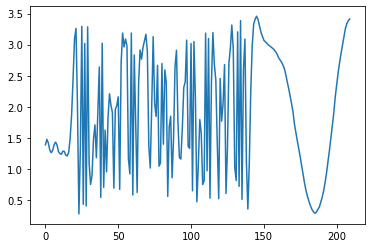

In [45]:
plt.plot(xlabels)
plt.show()

In [15]:
for cls in [cls1_c_w, cls2_c_w, cls3_c_w, cls4_c_w, cls5_c_w, cls6_c_w, cls7_c_w]:
    xlabels = cls[0][:, 4]
    max_ = max(xlabels)
    min_ = min(xlabels)
    print(max_, min_)
xlabels = xlabels - min_ / max_ - min_
#print(xlabels)

3.4570790000000002 0.273071
3.436232 0.106921
3.422333 0.11924000000000001
3.354104 0.114186
3.44476 0.146405
3.4823489999999997 0.23074299999999998
3.45929 0.222215


In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [36]:
dataset = cls1_c_w[0][:, 4].reshape(-1, 1)
print(dataset)

[[1.38621]
 [1.4740229999999999]
 [1.41527]
 [1.302188]
 [1.2592290000000002]
 [1.298397]
 [1.3903159999999999]
 [1.429801]
 [1.380208]
 [1.2753379999999999]
 [1.2450139999999998]
 [1.234275]
 [1.284815]
 [1.278497]
 [1.217849]
 [1.2071100000000001]
 [1.268705]
 [1.49266]
 [1.873919]
 [2.4620759999999997]
 [3.0969830000000003]
 [3.260606]
 [2.02617]
 [0.273071]
 [1.3378809999999999]
 [3.293772]
 [0.427217]
 [3.0195939999999997]
 [0.40068400000000004]
 [3.28556]
 [1.090868]
 [0.747513]
 [0.8928149999999999]
 [1.470548]
 [1.706506]
 [1.1789969999999999]
 [1.884659]
 [2.639914]
 [0.539036]
 [3.021805]
 [0.70108]
 [1.623116]
 [0.9512520000000001]
 [1.8300130000000001]
 [2.208114]
 [2.022696]
 [1.90677]
 [0.688445]
 [1.9579419999999998]
 [2.0166939999999998]
 [2.159153]
 [0.66886]
 [2.711617]
 [3.187323]
 [2.962421]
 [3.090034]
 [2.979162]
 [1.1581489999999999]
 [0.9171370000000001]
 [3.186375]
 [0.577257]
 [2.833544]
 [1.6894490000000002]
 [0.618637]
 [2.381845]
 [2.9140919999999997]
 [2.7

In [40]:
scaler = StandardScaler().fit(dataset)
scaled_dataset = scaler.transform(dataset)
print(scaled_dataset.reshape(1, -1))

[[-5.42642091e-01 -4.51132146e-01 -5.12358659e-01 -6.30201434e-01
  -6.74969017e-01 -6.34152036e-01 -5.38363227e-01 -4.97215901e-01
  -5.48896776e-01 -6.58181825e-01 -6.89782471e-01 -7.00973585e-01
  -6.48305841e-01 -6.54889830e-01 -7.18091123e-01 -7.29282237e-01
  -6.65094075e-01 -4.31710524e-01 -3.44004423e-02  5.78518087e-01
   1.24015480e+00  1.41066636e+00  1.24260356e-01 -1.70264447e+00
  -5.93005752e-01  1.44522866e+00 -1.54200889e+00  1.15950771e+00
  -1.56965894e+00  1.43667093e+00 -8.50418049e-01 -1.20822836e+00
  -1.05680912e+00 -4.54753444e-01 -2.08861564e-01 -7.58578800e-01
  -2.32082861e-02  7.63843104e-01 -1.42548229e+00  1.16181179e+00
  -1.25661620e+00 -2.95762300e-01 -9.95911911e-01 -8.01548939e-02
   3.13864235e-01  1.20640100e-01 -1.66408515e-04 -1.26978314e+00
   5.31599431e-02  1.14385414e-01  2.62841967e-01 -1.29019267e+00
   8.38564814e-01  1.33429813e+00  1.09992771e+00  1.23291325e+00
   1.11737351e+00 -7.80304505e-01 -1.03146316e+00  1.33331022e+00
  -1.38565

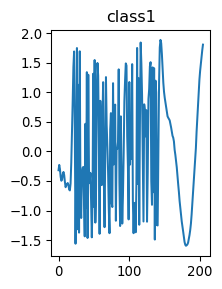

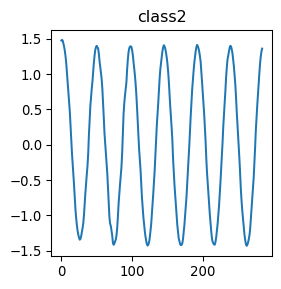

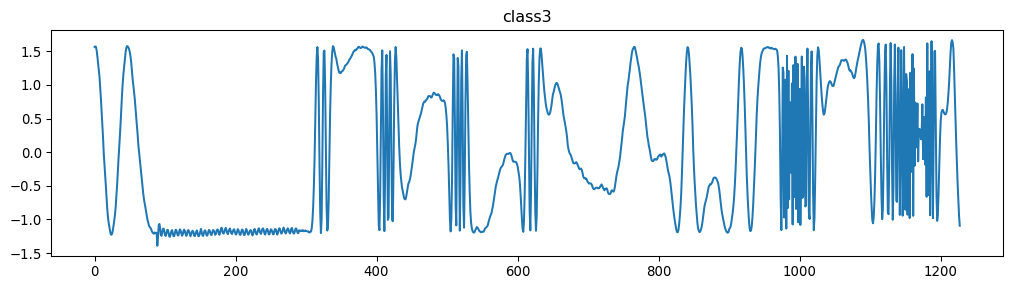

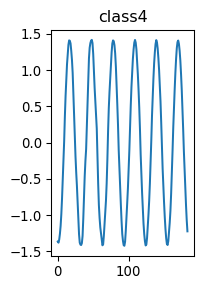

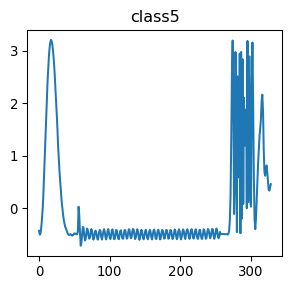

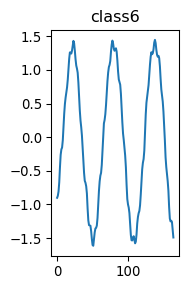

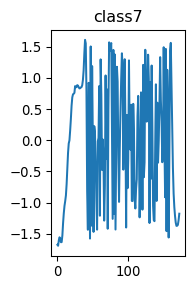

In [43]:
width = 300
height = 300
dpi = 96
i = 1
for cls in [cls1_c_w, cls2_c_w, cls3_c_w, cls4_c_w, cls5_c_w, cls6_c_w, cls7_c_w]:
    width = cls[38][:, 4].shape[0]
    height = 300
    xlabels = cls[38][:, 4]
    ## 정규화 minmax
    #max_ = max(xlabels)
    #min_ = min(xlabels)
    #xlabels = (xlabels - min_) / (max_ - min_)
    ## 표준화 standard
    xlabels = xlabels.reshape(-1, 1)
    scaler = StandardScaler().fit(xlabels)
    scaled_dataset = scaler.transform(xlabels)
    xlabels = scaled_dataset.reshape(1, -1)[0]
    
    plt.figure(figsize=(width/dpi, height/dpi), dpi=dpi)
    plt.title("class{}".format(i))
    plt.plot(xlabels)
    plt.show()
    i+=1

In [23]:
print(cls1_c_w[0][:, 4].shape[0])

210


class1


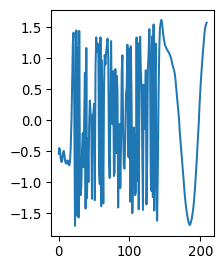

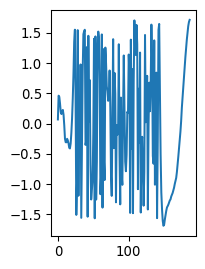

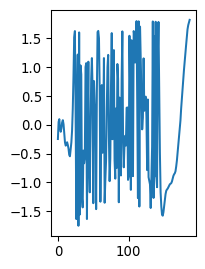

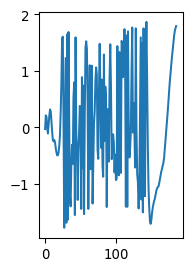

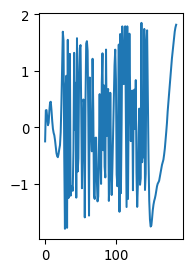

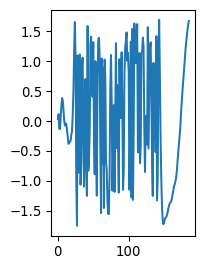

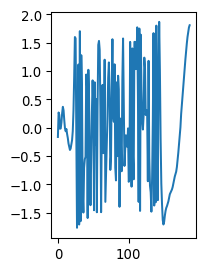

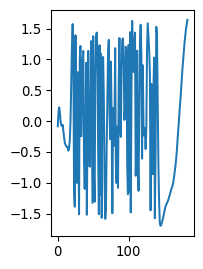

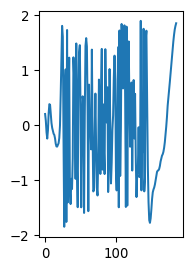

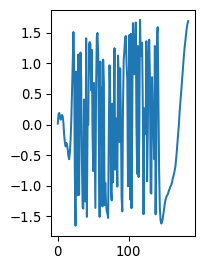

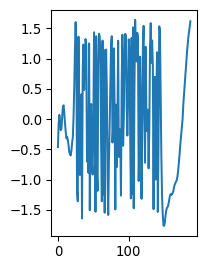

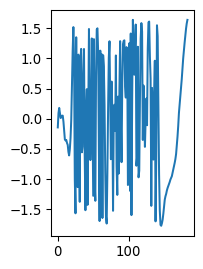

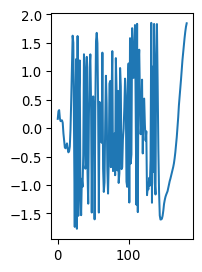

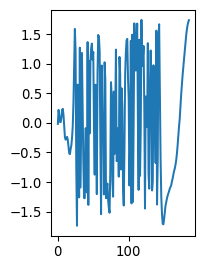

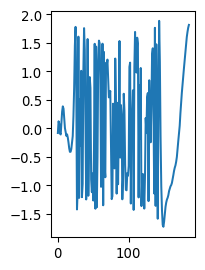

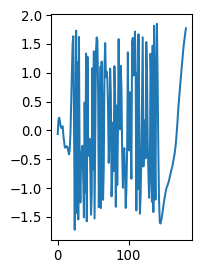

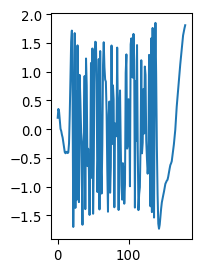

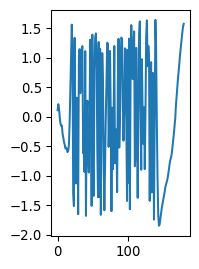

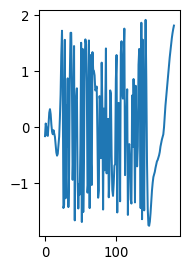

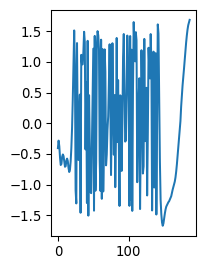

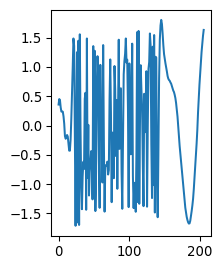

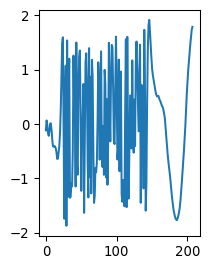

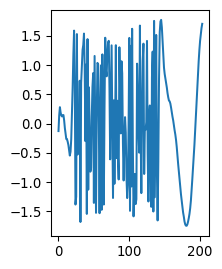

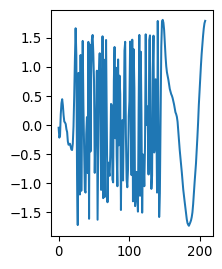

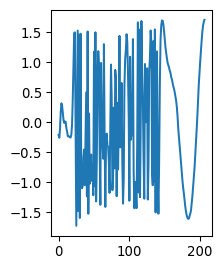

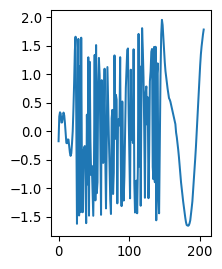

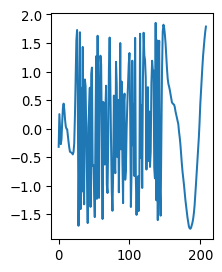

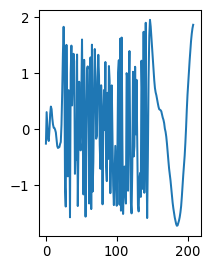

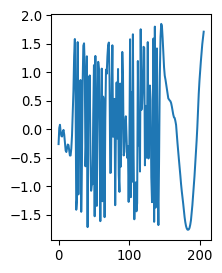

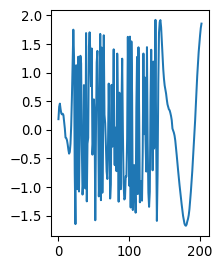

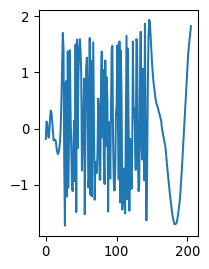

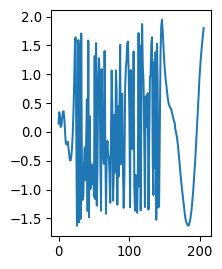

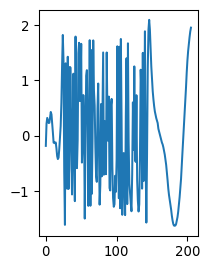

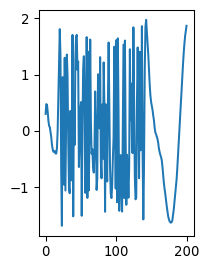

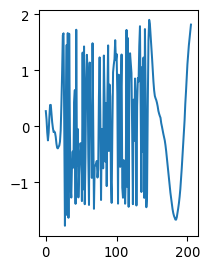

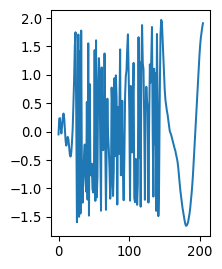

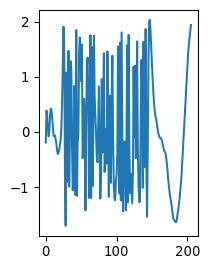

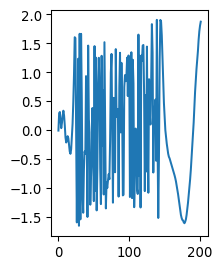

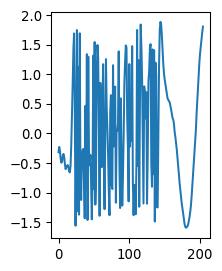

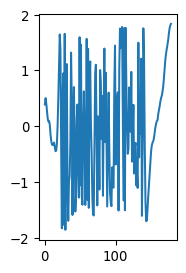

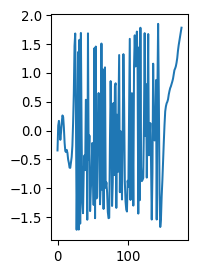

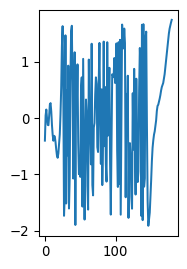

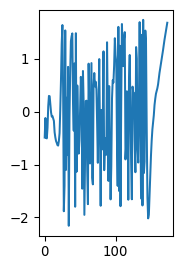

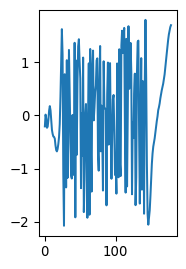

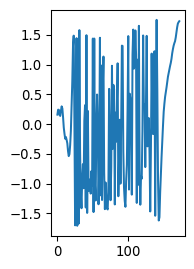

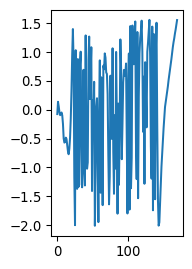

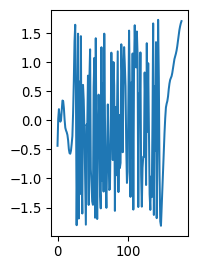

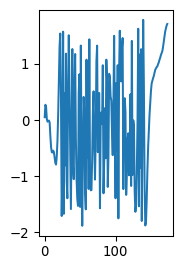

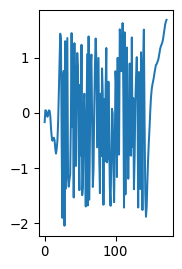

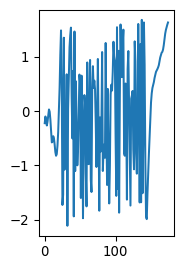

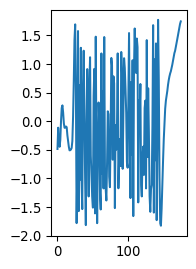

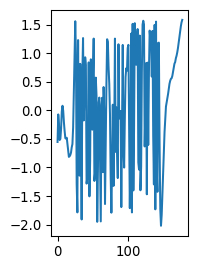

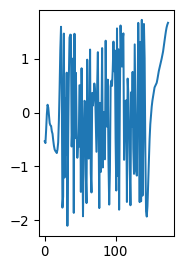

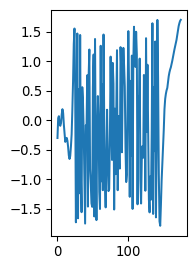

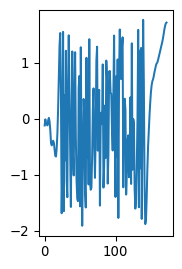

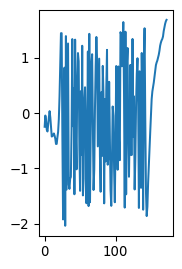

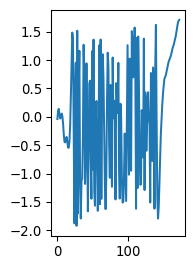

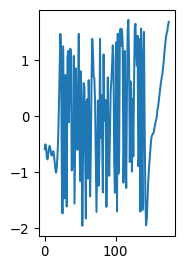

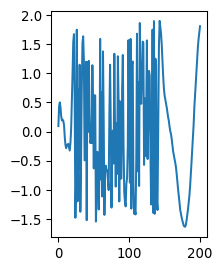

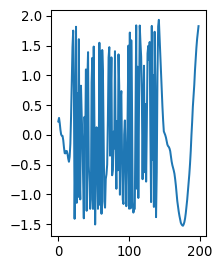

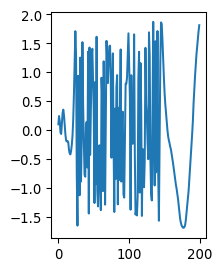

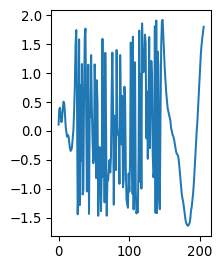

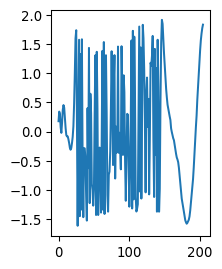

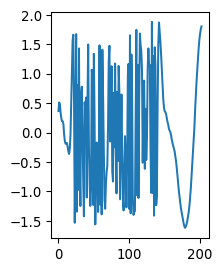

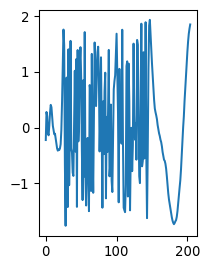

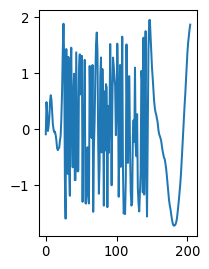

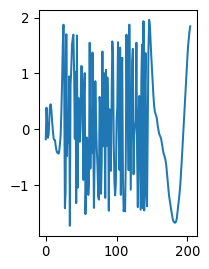

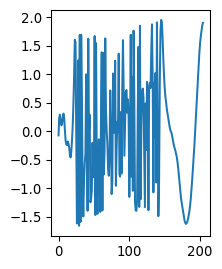

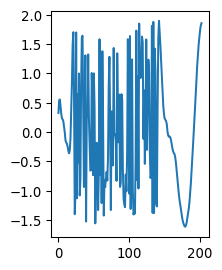

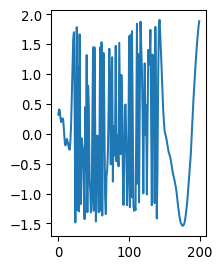

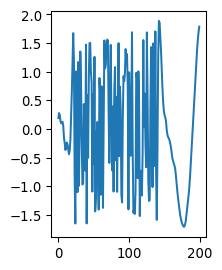

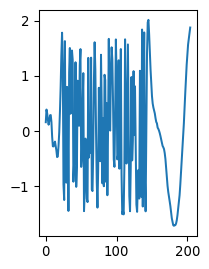

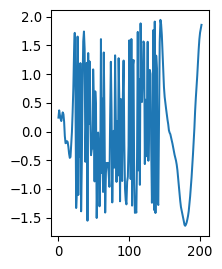

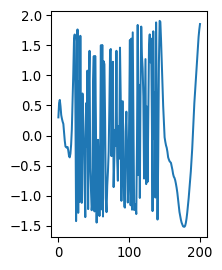

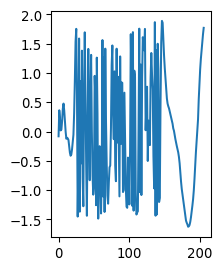

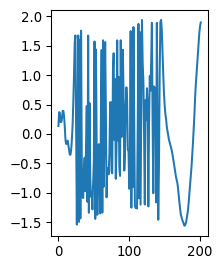

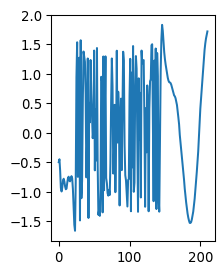

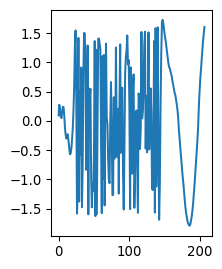

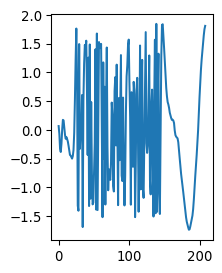

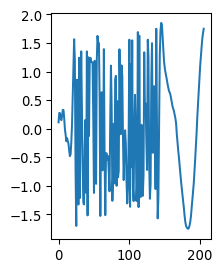

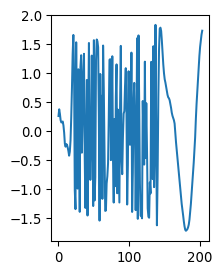

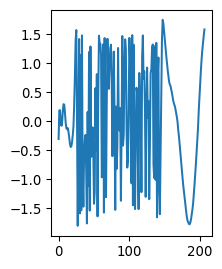

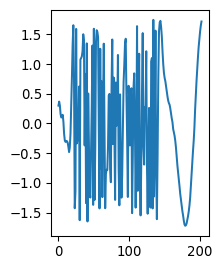

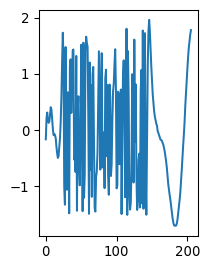

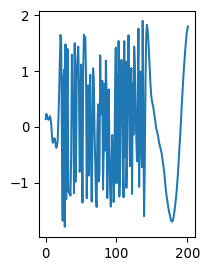

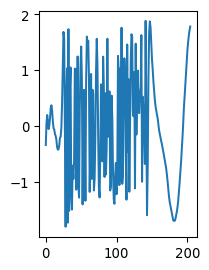

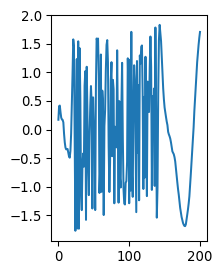

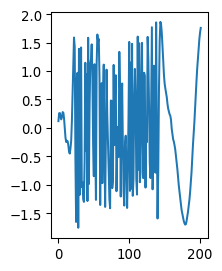

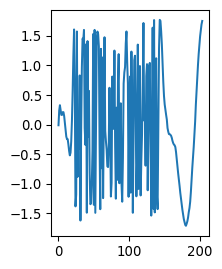

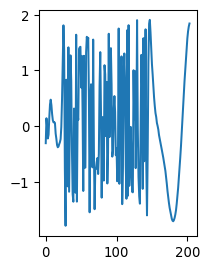

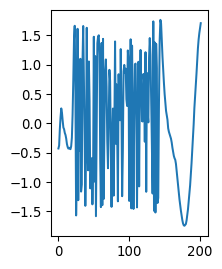

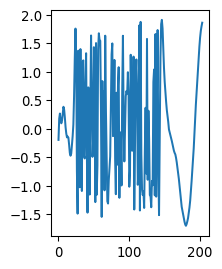

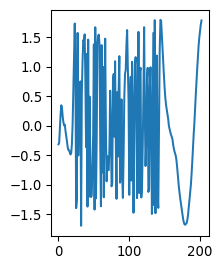

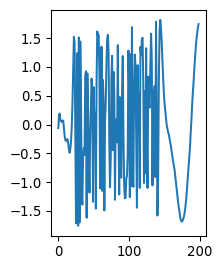

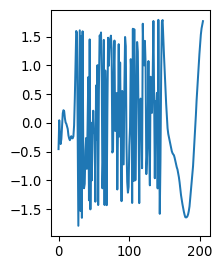

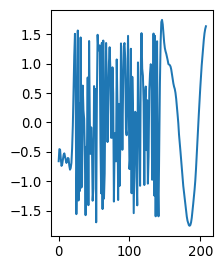

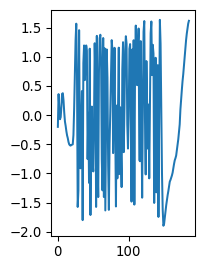

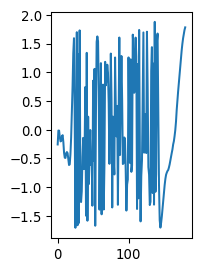

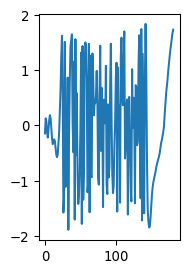

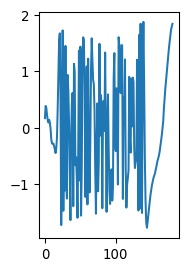

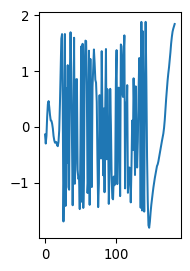

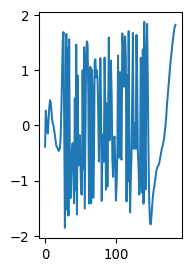

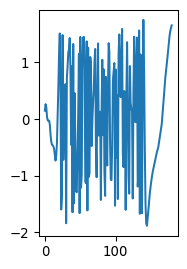

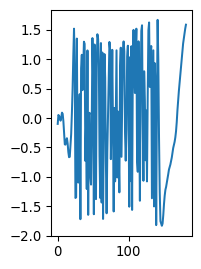

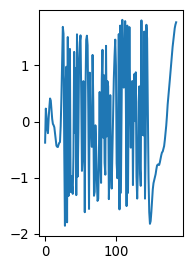

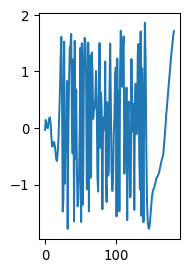

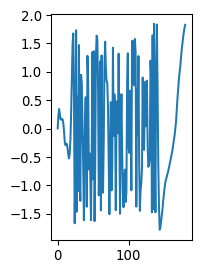

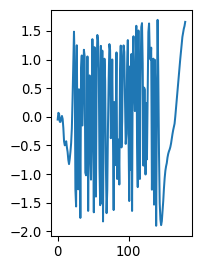

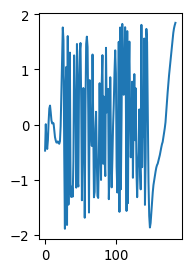

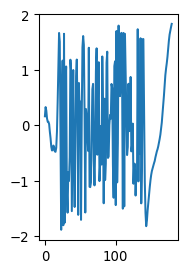

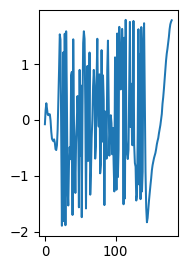

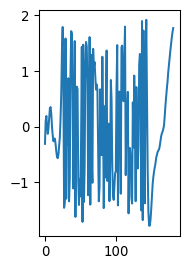

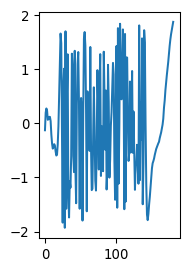

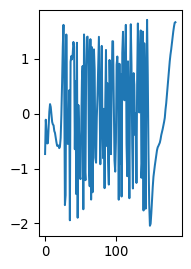

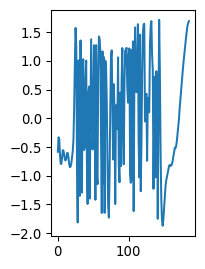

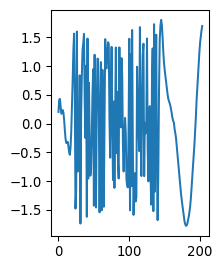

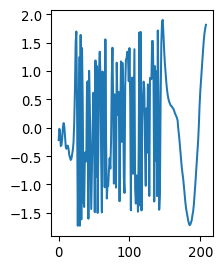

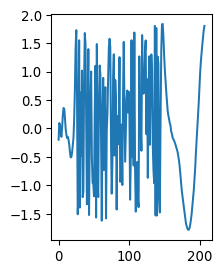

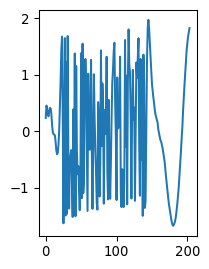

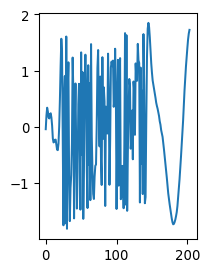

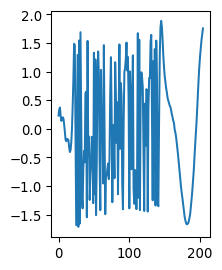

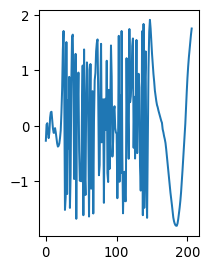

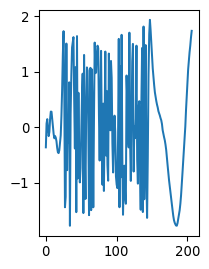

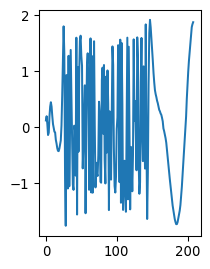

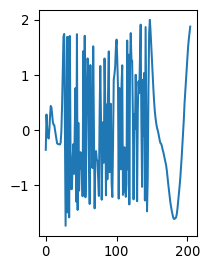

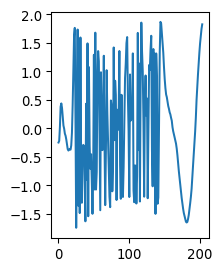

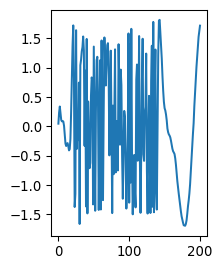

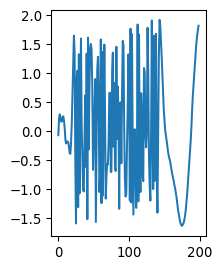

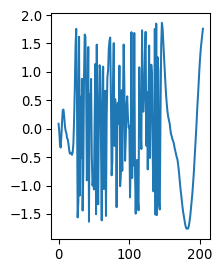

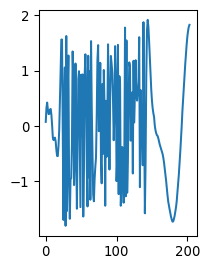

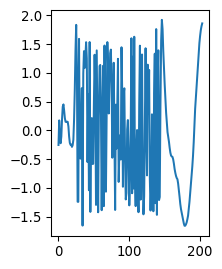

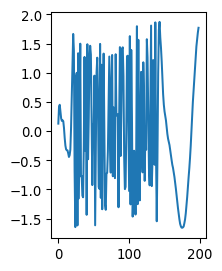

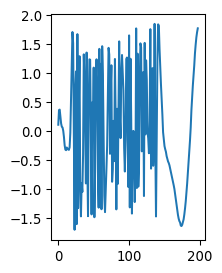

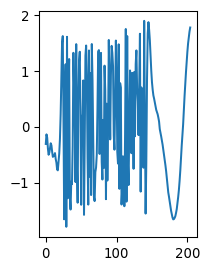

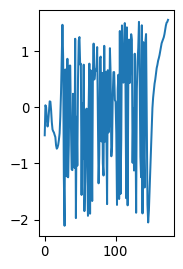

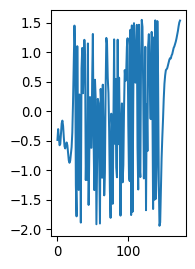

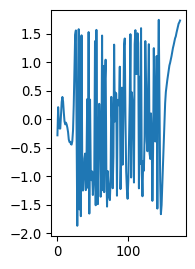

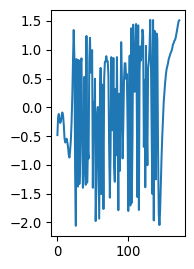

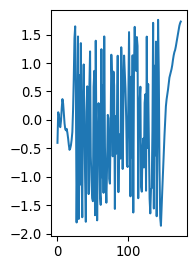

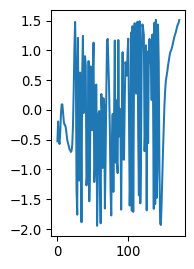

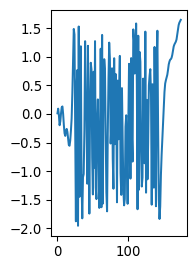

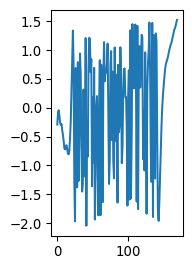

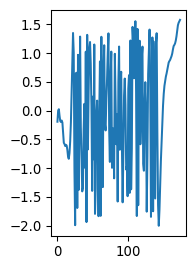

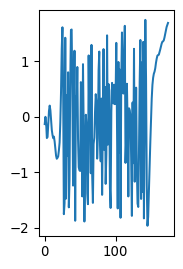

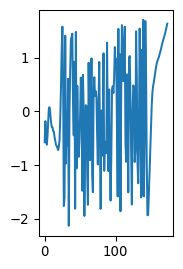

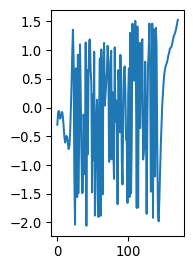

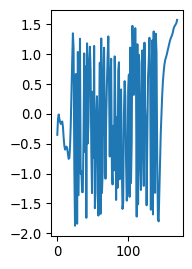

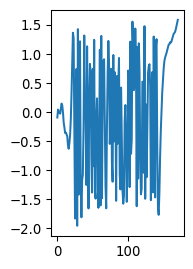

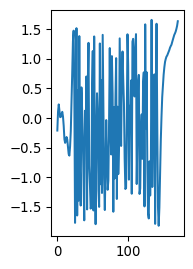

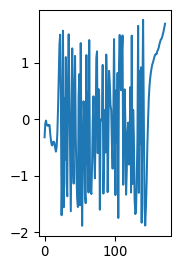

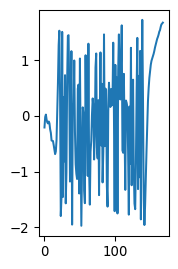

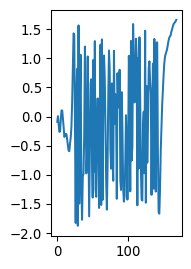

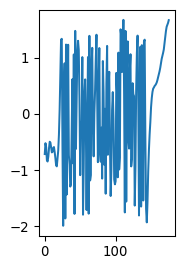

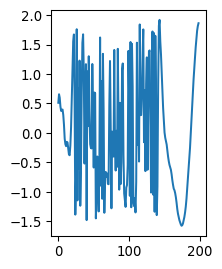

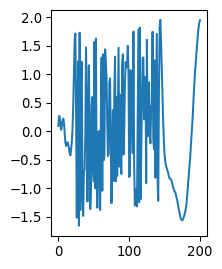

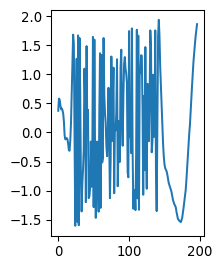

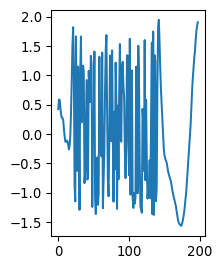

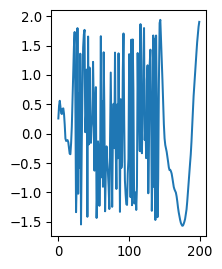

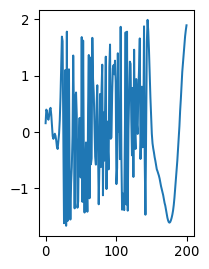

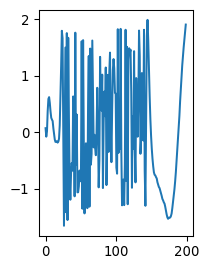

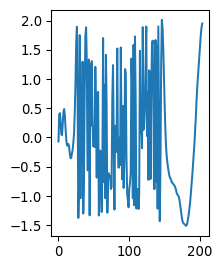

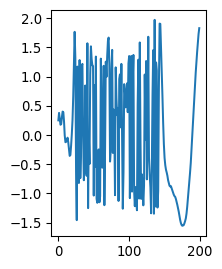

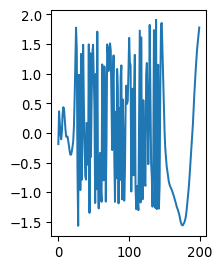

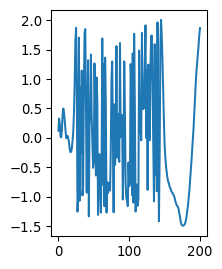

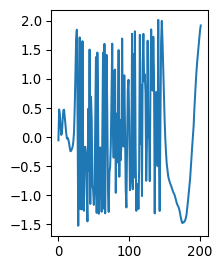

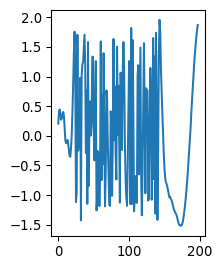

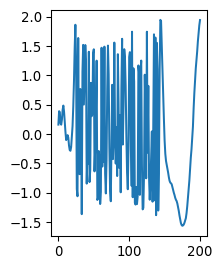

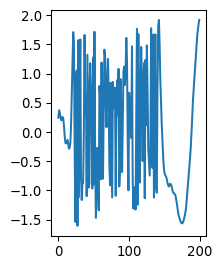

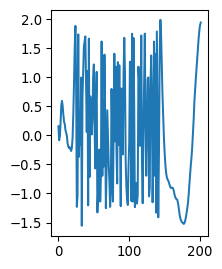

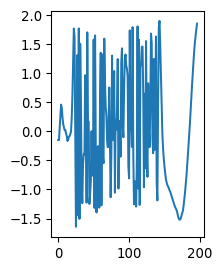

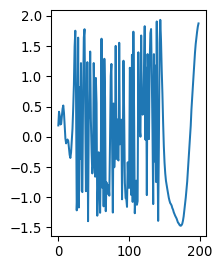

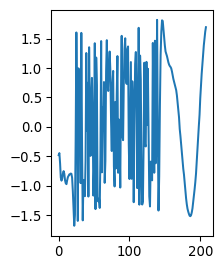

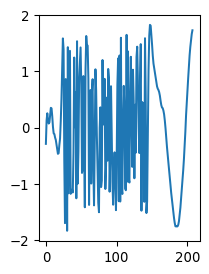

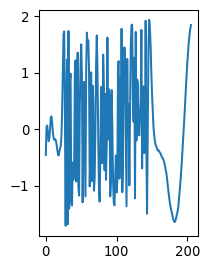

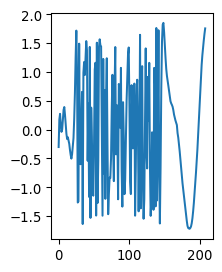

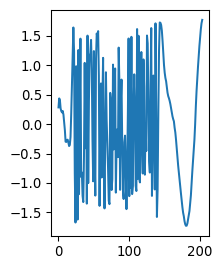

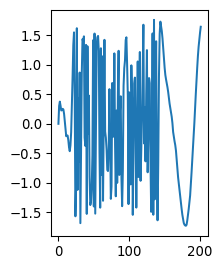

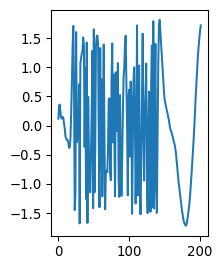

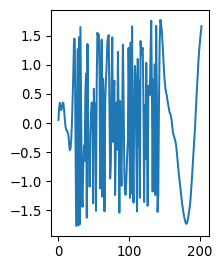

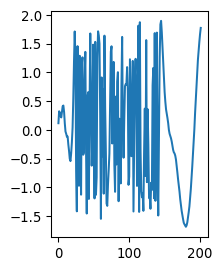

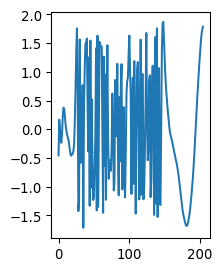

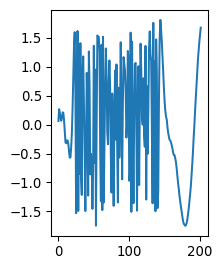

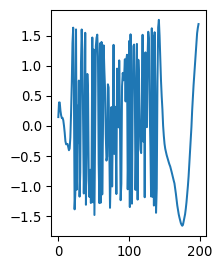

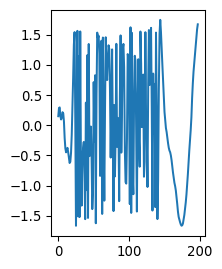

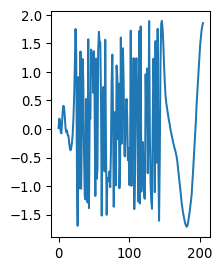

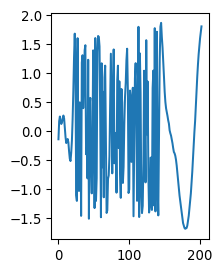

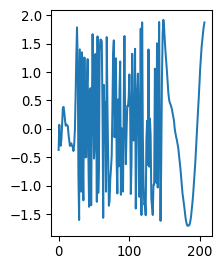

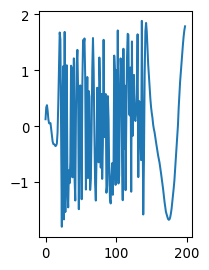

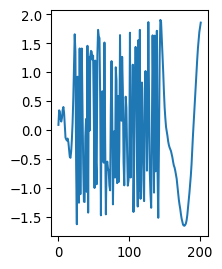

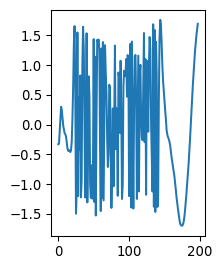

In [44]:
width = 300
height = 300
dpi = 96
i = 1
print("class1")
for cls in cls1_c_w:
    width = cls[:, 4].shape[0]
    height = 300
    xlabels = cls[:, 4]
    #max_ = max(xlabels)
    #min_ = min(xlabels)
    #xlabels = (xlabels - min_) / (max_ - min_)
    xlabels = xlabels.reshape(-1, 1)
    scaler = StandardScaler().fit(xlabels)
    scaled_dataset = scaler.transform(xlabels)
    xlabels = scaled_dataset.reshape(1, -1)[0]
    
    plt.figure(figsize=(width/dpi, height/dpi), dpi=dpi)
    plt.plot(xlabels)
    plt.show()
    i+=1

In [12]:
from pyts.image import RecurrencePlots

[[[1. 1. 1. ... 0. 0. 0.]
  [1. 1. 1. ... 0. 0. 0.]
  [1. 1. 1. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 1. 1. 1.]
  [0. 0. 0. ... 1. 1. 1.]
  [0. 0. 0. ... 1. 1. 1.]]]


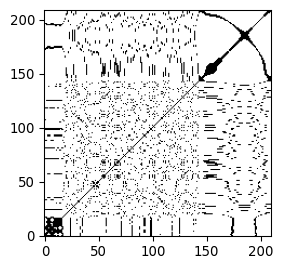

In [69]:
width = 300
height = 300
dpi = 96
values = [cls1_c_w[0][:, 4].tolist()]
rp = RecurrencePlots(dimension=1,epsilon='percentage_points', percentage=10)
plt.figure(figsize=(width/dpi, height/dpi), dpi=dpi)
#plt.axis('off')
# RP 변환 및 이미지 파일 생성 저장
values_rp = rp.fit_transform(values)
print(values_rp)
plt.imshow(values_rp[0], cmap='binary', origin='lower')

210
283
1227
184
364
115
182


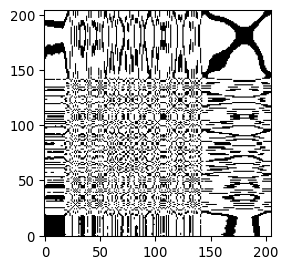

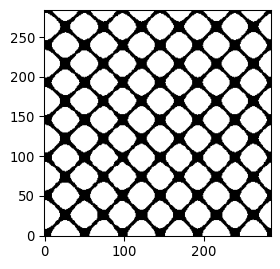

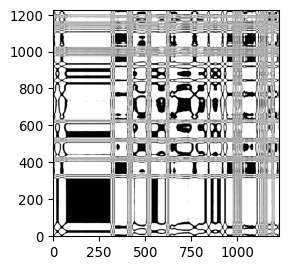

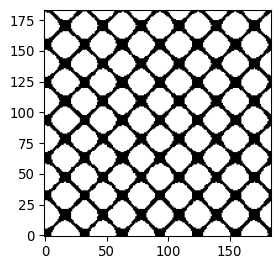

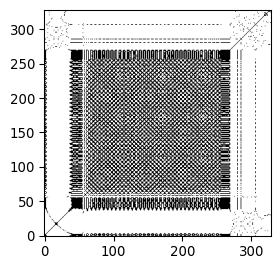

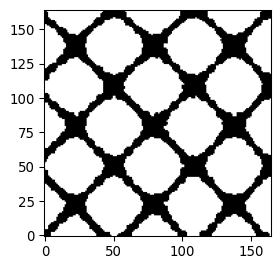

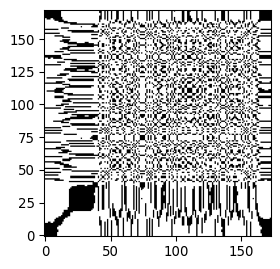

In [101]:
width = 300
height = 300
## 문제의 이미지 38번 
for cls in [cls1_c_w, cls2_c_w, cls3_c_w, cls4_c_w, cls5_c_w, cls6_c_w, cls7_c_w]:
    #width = cls[38][:, 4].shape[0] / 2
    #height = width
    
    values = cls[38][:, 4]
    #max_ = max(values)
    #min_ = min(values)
    #values = (values - min_) / (max_ - min_)
    
    values = [values.tolist()]
    rp = RecurrencePlots(dimension=1,epsilon='percentage_points', percentage=30)
    plt.figure(figsize=(width/dpi, height/dpi), dpi=dpi)
    #plt.axis('off')
    # RP 변환 및 이미지 파일 생성 저장
    values_rp = rp.fit_transform(values)
    plt.imshow(values_rp[0], cmap='binary', origin='lower')
    print(cls[0][:, 4].shape[0])

## 데이터 재구조화 시켜보기

- 각 시계열 데이터 셋을 N(=20)등분한다.
- 일정한 규칙으로 등분된 데이터셋을 섞어 새로운 시계열 데이터 셋을 만든다.
- 해당하는 데이터셋을 그려보자

In [37]:
dst = cls2_c_w[0]
print(dst)

[['CHIP1' 'WIRE1' 'AXISX' 2 3.424228]
 ['CHIP1' 'WIRE1' 'AXISX' 2 3.436232]
 ['CHIP1' 'WIRE1' 'AXISX' 2 3.396747]
 ...
 ['CHIP1' 'WIRE1' 'AXISX' 2 3.163948]
 ['CHIP1' 'WIRE1' 'AXISX' 2 3.246707]
 ['CHIP1' 'WIRE1' 'AXISX' 2 3.3032489999999997]]


### 시계열 데이터셋 N 분할 하기

In [21]:
def divide_dataset(dataset, N):
    divided_dataset = []
    base_size = dataset.shape[0] // N
    remainder = dataset.shape[0] % N
    start = 0
    for i in range(N):
        # N으로 나눈 몫이 기본적 등분 크기이다.
        # N으로 나눈 나머지는 1씩 재 배분한다.
        # [1, ... , remainder, ... , N - remainder, ..., N]
        if i >= N - remainder:
            # 1추가 분할
            divided_dataset.append(dataset[start: start + base_size + 1, :])
            start += base_size + 1
        else :
            # base_size 분할
            divided_dataset.append(dataset[start: start + base_size, :])
            start += base_size
    
    return divided_dataset


In [16]:
import random 
N = 20
random_index = random.sample(range(N), N)
random_index

[9, 0, 3, 4, 18, 12, 14, 13, 8, 7, 2, 19, 5, 1, 15, 6, 17, 10, 16, 11]

### 분할된 데이터셋 랜덤 샘플링

In [22]:
def sampling_dataset(dataset, random_index):
    sampling_dataset = []
    for idx in random_index:
        sampling_dataset.append(dataset[idx])
    return sampling_dataset


In [128]:
sampling_dataset = np.array(sampling_dataset)
print(sampling_dataset.shape)

(20,)


In [118]:
data = np.empty((1, 5))
data = np.append(data, sampling_dataset[0], axis=0)
data = np.delete(data, [0, 0], axis=0) #  []는 시작과 끝 을 담는다.
data

array([['CHIP1', 'WIRE1', 'AXISX', 1, 0.380468],
       ['CHIP1', 'WIRE1', 'AXISX', 1, 0.45533],
       ['CHIP1', 'WIRE1', 'AXISX', 1, 0.536825],
       ['CHIP1', 'WIRE1', 'AXISX', 1, 0.6398],
       ['CHIP1', 'WIRE1', 'AXISX', 1, 0.774362],
       ['CHIP1', 'WIRE1', 'AXISX', 1, 0.928193],
       ['CHIP1', 'WIRE1', 'AXISX', 1, 1.104135],
       ['CHIP1', 'WIRE1', 'AXISX', 1, 1.29208],
       ['CHIP1', 'WIRE1', 'AXISX', 1, 1.488237],
       ['CHIP1', 'WIRE1', 'AXISX', 1, 1.691028],
       ['CHIP1', 'WIRE1', 'AXISX', 1, 1.895083]], dtype=object)

### 샘플링한 데이터 재 결합

In [28]:
def reconstruct_dataset(dataset, shape, N):
    restruct_data = np.empty(shape)
    for i in range(N):
        restruct_data = np.append(restruct_data, dataset[i], axis=0)
    restruct_data = np.delete(restruct_data, [0, 0], axis=0)
    return restruct_data

### 최종 함수..

- N개 데이터셋 분할
- 샘플링
- 재구조화

In [32]:
def SamplingDataset(dataset, random_index, N=20, shape=(1, 5)):
    #print("####divided check####")
    dvd_dst = divide_dataset(dataset, N)
    #for dvd in dvd_dst:
    #    print(len(dvd))
        
    #print("####sampling check####")
    spl_dst = sampling_dataset(dvd_dst, random_index)
    #for spl in spl_dst:
    #    print(len(spl))
        
    #print("####reconstruct check####")
    rec_dst = reconstruct_dataset(spl_dst, shape, N)
    return rec_dst

new_dataset = SamplingDataset(dst, random_index=random_index)
print(new_dataset)

[['CHIP1' 'WIRE1' 'AXISX' 1 2.9084060000000003]
 ['CHIP1' 'WIRE1' 'AXISX' 1 1.7526240000000002]
 ['CHIP1' 'WIRE1' 'AXISX' 1 1.1821549999999998]
 ...
 ['CHIP1' 'WIRE1' 'AXISX' 1 0.5178729999999999]
 ['CHIP1' 'WIRE1' 'AXISX' 1 2.454811]
 ['CHIP1' 'WIRE1' 'AXISX' 1 1.7665220000000001]]


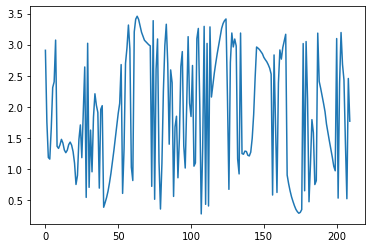

In [30]:
plt.plot(new_dataset[:, 4])
plt.show()

[[[1. 0. 0. ... 0. 0. 0.]
  [0. 1. 0. ... 0. 0. 1.]
  [0. 0. 1. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 1. 0. 0.]
  [0. 0. 0. ... 0. 1. 0.]
  [0. 1. 0. ... 0. 0. 1.]]]


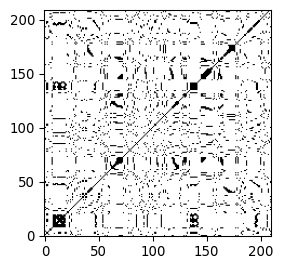

In [31]:
width = 300
height = 300
dpi = 96
values = [new_dataset[:, 4].tolist()]
rp = RecurrencePlots(dimension=1,epsilon='percentage_points', percentage=10)
plt.figure(figsize=(width/dpi, height/dpi), dpi=dpi)
#plt.axis('off')
# RP 변환 및 이미지 파일 생성 저장
values_rp = rp.fit_transform(values)
print(values_rp)
plt.imshow(values_rp[0], cmap='binary', origin='lower')

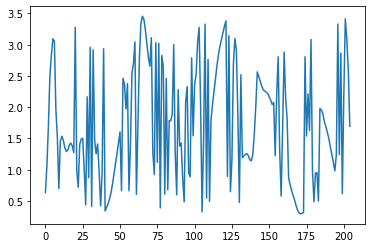

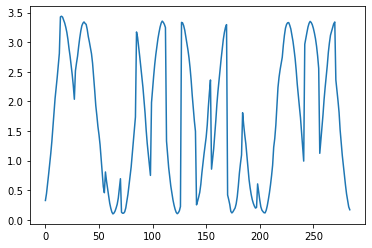

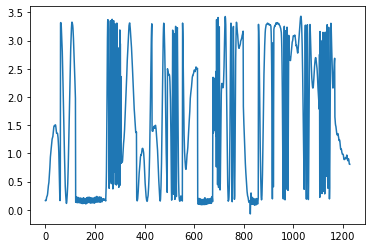

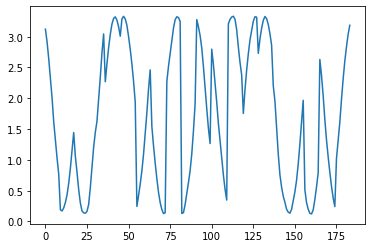

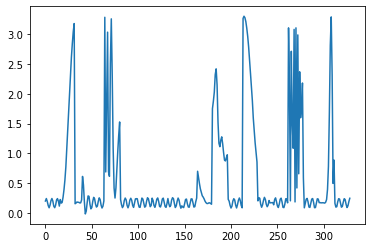

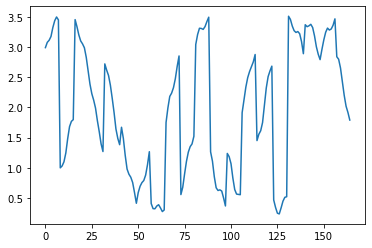

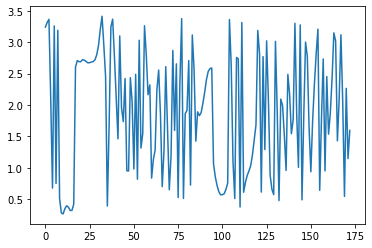

In [49]:
for cls in [cls1_c_w, cls2_c_w, cls3_c_w, cls4_c_w, cls5_c_w, cls6_c_w, cls7_c_w]:
    new_dataset = SamplingDataset(cls[38], random_index=random_index)
    plt.plot(new_dataset[:, 4])
    plt.show()

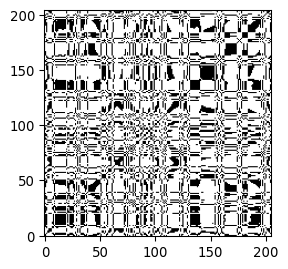

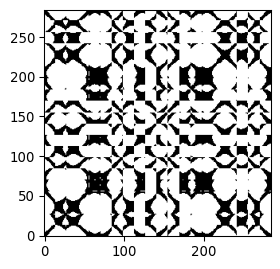

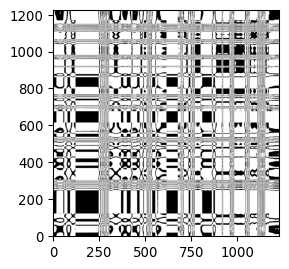

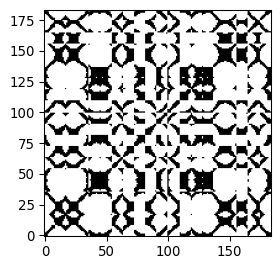

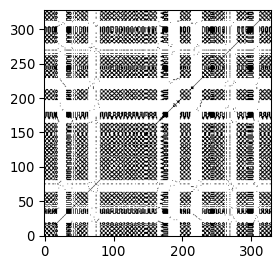

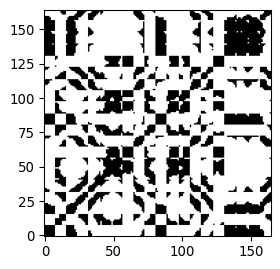

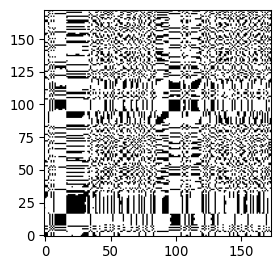

In [48]:
width = 300
height = 300
dpi = 96
i = 0
for cls in [cls1_c_w, cls2_c_w, cls3_c_w, cls4_c_w, cls5_c_w, cls6_c_w, cls7_c_w]:
    new_dataset = SamplingDataset(cls[38], random_index=random_index)

    values = [new_dataset[:, 4].tolist()]
    rp = RecurrencePlots(dimension=1,epsilon='percentage_points', percentage=30)
    plt.figure(figsize=(width/dpi, height/dpi), dpi=dpi)
    #plt.axis('off')
    # RP 변환 및 이미지 파일 생성 저장
    values_rp = rp.fit_transform(values)
    plt.imshow(values_rp[0], cmap='binary', origin='lower')